## Install dependencies

In [2]:
!pip install ratinabox 
!pip install tomplotlib 
!pip install tqdm 

## Import necessary packages and utils functions 

In [3]:
import ratinabox
from ratinabox.Environment import Environment
from ratinabox.Agent import Agent
from ratinabox.Neurons import PlaceCells
from ratinabox.contribs.ValueNeuron import ValueNeuron
from ratinabox.contribs.ThetaSequenceAgent import ThetaSequenceAgent

import numpy as np 

from utils import * #import utils functions for this script

from tqdm import tqdm
import matplotlib
import matplotlib.pyplot as plt
cmap = matplotlib.cm.get_cmap('viridis')
from tomplotlib import tomplotlib as tpl
tpl.figure_directory = "./figures/"
%load_ext autoreload
%autoreload 2

importing tomplotlib module
importing tomplotlib package


## Define some constants 

In [14]:
# globals
constants = {
'tau' : 4,  # timescale of value function (analagous to gamma)
'tau_N' : 0.01, #neuronal timescale
'size' : 2.0,  # size of 1D environment
'dx' : 0.005,  # discretisation of environment
'dx_cells' : 0.01,  # distance between basis features
'radius_cells' : 0.02,  # radius of each basis feature
'speed' : 0.1,  # agent speed in in ms-1
'dt' : 0.05,  # time discretisation
'L2' : 1e-6,  # L2 reg
'eta' : 1,  # learning rate
'theta_frac' : 0.75,  # sweep fraction
'theta_freq' : 5, # theta frequency 
}
constants['N_cells'] = int(constants['size'] / constants['dx_cells'])  # number of basis features

## Simulate normal RL with eligibility traces


### Run simulations and save results
See paper for terminating conditions 

In [15]:
#name, tau eta
params = [
    ('4',4,0.4),
    ('2',2,0.5),
    ('1',1,0.6),
    ('1_2',1/2,0.8),
    ('1_4',1/4,1.1),
    ('1_8',1/8,1.3), ]

In [19]:
#name, tau eta
params = [
    ('4',4,0.4),
    ('2',2,0.5),
    ('1',1,0.6),
    ('1_2',1/2,0.8),
    ('1_4',1/4,1.1),
    ('1_8',1/8,1.3),
]

N_repeats = 3 # 50 in paper 
for (name,tau,eta) in params:
    constants['eta'] = eta
    results, (Env, Ag, Features, Reward, Value) = run_simulation(N_repeats=N_repeats, tau_e=tau, max_laps=32, agent_type='normal', **constants)
    pickle_and_save(results,f"taue_"+name)

Lap = 31.952, R2 = 0.990, CC = 0.995: 100%|██████████| 20480/20480 [00:18<00:00, 1083.85it/s]


### Make plots

Figure saved to /Users/tomgeorge/Documents/UCL/EligibilitySweeps/figures/18_04_23/normal_trainingcurves_1923.png  & .svg


'./figures/18_04_23/normal_trainingcurves_1923'

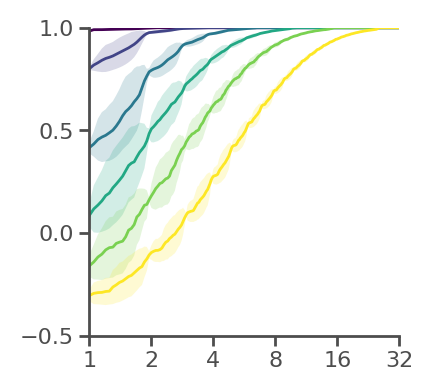

In [21]:
fig, ax = None, None
for (i,(name, tau, _)) in enumerate(params):
    color = cmap(i/(len(params)-1))
    results = load_and_depickle("taue_"+name,directory="./results/final_results/learning_curves/")
    fig, ax = plot_r2(results,fig=fig,ax=ax,color=color,label=str(tau),**constants)
tpl.save_figure(fig,"normal_trainingcurves")

In [1]:
fig, ax = plt.subplots(1,len(params),figsize=(10,2))
for (i,(name, tau, _)) in enumerate(params):
    results = load_and_depickle("taue_"+name,directory="./results/final_results/evolution/")
    fig, ax[i] = plot_ratemap_evolution(results,fig=fig, ax=ax[i],**constants)
tpl.saveFigure(fig,"evolution_normal_"+str(tau))

NameError: name 'plt' is not defined

## Same but for the theta sweep agent 

In [ ]:
#name, tau (--> converted to v_sweep) eta
params = [
    ('4',4,8),
    ('2',2,8),
    ('1',1,2),
    ('1_2',1/2,2),
    ('1_4',1/4,2),
    ('1_8',1/8,0.75),
]

N_repeats = [10,10,10,10,10,10]

for (i,(name,tau,eta)) in enumerate(params):
    v_sweep = constants['speed']*((tau/constants['tau_N']) - 1)
    dt = min(0.003/v_sweep,0.003)
    constants['dt'] = dt
    constants['eta'] = eta
    results, (Env, Ag, Features, Reward, Value) = run_simulation(N_repeats=N_repeats[i], tau_e=constants['tau_N'], v_sweep=v_sweep,max_laps=32, agent_type='theta', **constants)
    pickle_and_save(results,f"sweep_"+name)

Lap = 31.972, R2 = 0.830, CC = 0.959: 100%|██████████| 245333/245333 [02:15<00:00, 1816.51it/s]


### make plots 

39.900000000000006
19.900000000000002
9.9
4.9
2.4000000000000004
1.1500000000000001


'./figures/230228/normal_trainingcurves_1308'

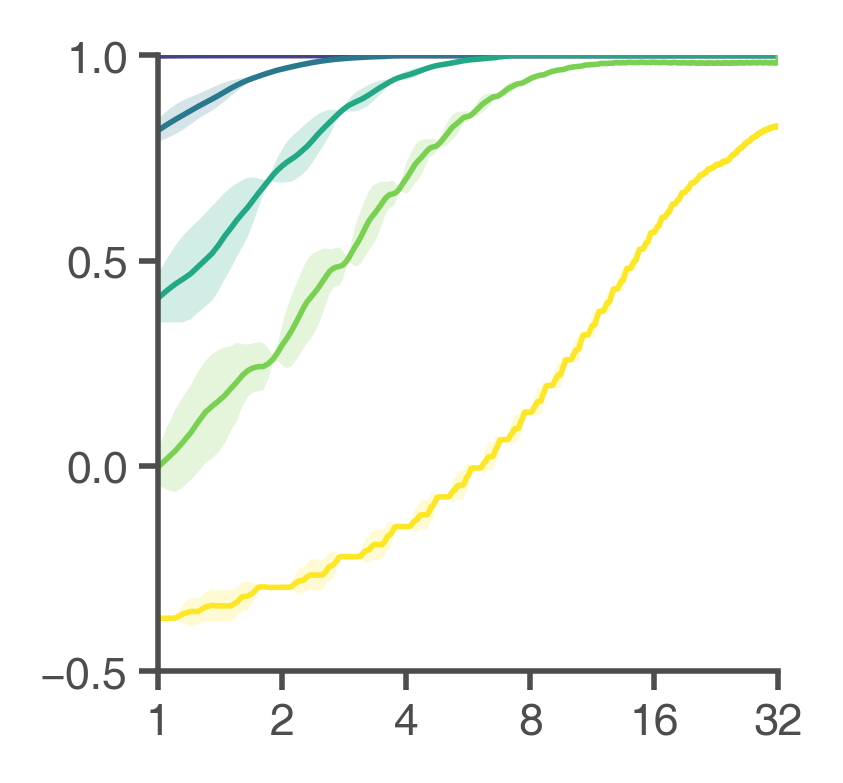

In [13]:
params = [
    ('4',4,8),
    ('2',2,8),
    ('1',1,2),
    ('1_2',1/2,2),
    ('1_4',1/4,2),
    ('1_8',1/8,0.75),
]
fig, ax = None, None
for (i,(name, tau, _)) in enumerate(params):
    print(constants['speed']*((tau/constants['tau_N']) - 1)
)
    color = cmap(i/(len(params)-1))
    results = load_and_depickle("sweep_"+name,directory="./results/")
    fig, ax = plot_r2(results,fig=fig,ax=ax,color=color,label=str(tau),**constants)
tpl.saveFigure(fig,"theta_trainingcurves")

'./figures/230228/evolution_normal_0.125_1237'

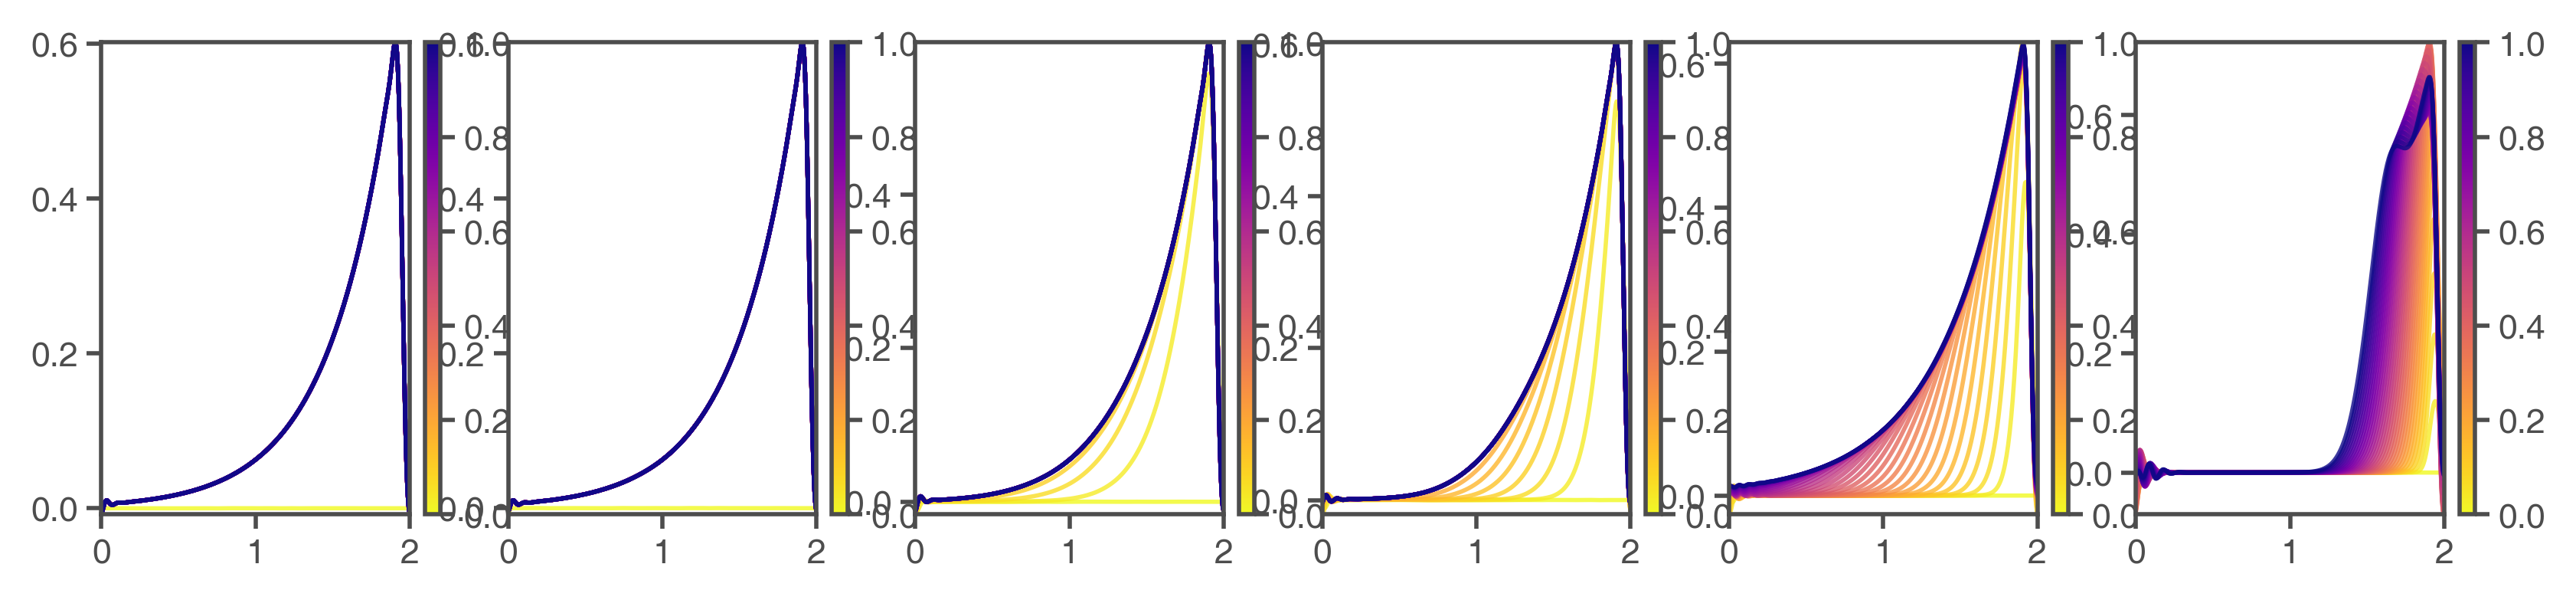

In [5]:
fig, ax = plt.subplots(1,len(params),figsize=(10,2))
for (i,(name, tau, _)) in enumerate(params):
    results = load_and_depickle("sweep_"+name,directory="./results/")
    fig, ax[i] = plot_ratemap_evolution(results,fig=fig, ax=ax[i],**constants)
tpl.saveFigure(fig,"evolution_theta_"+str(tau))